## Image Intensity Transformation

### importing libraries

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### load the image

Text(0.5, 1.0, 'Original Image')

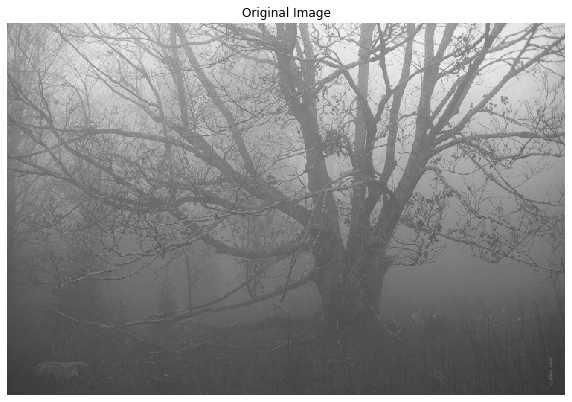

In [2]:
img = cv.imread('forest.jpg')
fig = plt.figure(figsize=(10, 14))
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")

### Log Transformation:   Log transformation here is used to  map small range of low intensity input values to a wider range of output values.

Text(0.5, 1.0, 'Log Transformed')

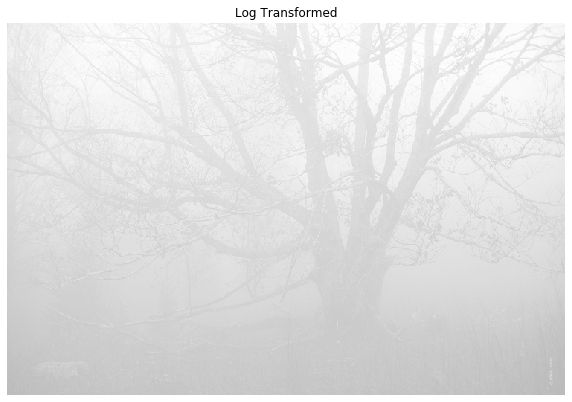

In [3]:
fig = plt.figure(figsize=(10, 14))
c = 255/(np.log(1+np.max(img)))
log_transformed=c*np.log(1 + img)
log_transformed=np.array(log_transformed, dtype = np.uint8)
plt.imshow(log_transformed)
plt.axis('off')
plt.title("Log Transformed")

### Power-Law (Gamma) Transformation: Here we have used four(4) different gamma values to brighten the image. Basically, an increase in the gamma value typically improve the brightness of the image, by reproducing the color. The number of the gamma values determines number of  new images that will be reproduced with respect to its color range(gamma value).


#### imwrite() dynamically creates and saves the images in our notebook working directory.                                                             imread() reads the images from the saved location, with help of imshow() displays the output back to the jupyter notebook

Text(0.5, 1.0, 'with gamma = 2.0')

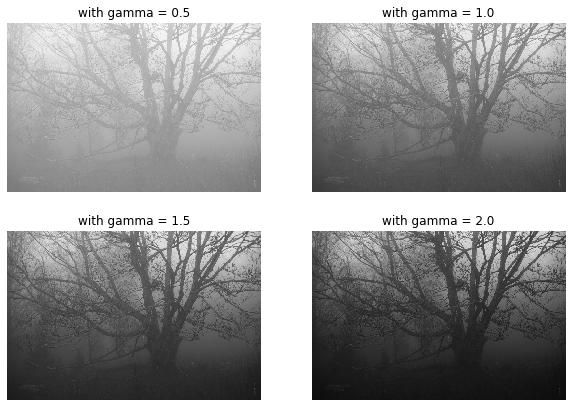

In [4]:
for gamma in [0.5, 1.0, 1.5, 2.0]:
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    cv.imwrite('F'+str(gamma)+'.jpg', gamma_corrected) 
    
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
# 
im1=cv.imread('F0.5.jpg')
im2=cv.imread('F1.0.jpg')
im3=cv.imread('F1.5.jpg')
im4=cv.imread('F2.0.jpg')

fig.add_subplot(rows, columns, 1)   
plt.imshow(im1)
plt.axis('off')
plt.title("with gamma = 0.5")
    
fig.add_subplot(rows, columns, 2)
plt.imshow(im2)
plt.axis('off')
plt.title("with gamma = 1.0")
    
fig.add_subplot(rows, columns, 3)
plt.imshow(im3)
plt.axis('off')
plt.title("with gamma = 1.5")
    
    
fig.add_subplot(rows, columns, 4)
plt.imshow(im4)
plt.axis('off')
plt.title("with gamma = 2.0")
       

### Piecewise-Linear Transformation Functions: Contrast stretching the range of intensity levels of the image here spread the image intensity across with some varying parameter values.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


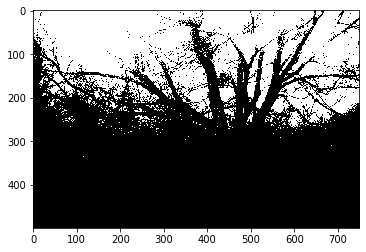

In [32]:
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0<=pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 -s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255-s2)/(255 - r2)) * (pix - r2) +s2
  
# Define parameters.
r1 = 140
s1 = 0
r2 = 120
s2 = 215
  
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
plt.imshow(contrast_stretched)
#plt.plot(contrast_stretched)

### View Histogram of low contrast image: From the previously gamma corrected image of gamma value 0.5, we can observe that the pixel intensities are more in the upper boundary of the range approx. 120 to 240 and cumulative histogram of the image increases with a steep slope within a narrow region and flatten in other region.

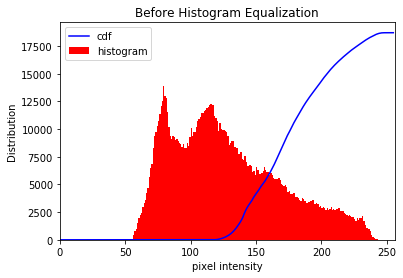

In [34]:
hist,bins = np.histogram(im1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Before Histogram Equalization')
plt.xlabel('pixel intensity')
plt.ylabel('Distribution')
plt.show()

### Histogram equalization: Here we first convert the image to a grayscale and apply histogram equalization technique using equalizeHist() method  to spreads out the pixel intensity values, then using imwrite() to save the new image result to the current jupyter notebook working directory.

In [36]:
src = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.equalizeHist(src)
cv.imwrite('New_Forest.jpeg',dst)
cv.waitKey()

-1

### Display the Histogram Equalized Image: with help of imread() and imshow() the saved image is again displayed for visualization.

Text(0.5, 1.0, 'Equalized Image')

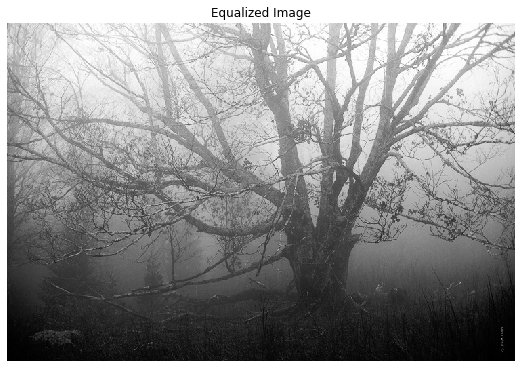

In [37]:
fig = plt.figure(figsize=(20, 14))
rows = 2
columns = 2
im1=cv.imread('New_Forest.jpeg')
fig.add_subplot(rows, columns, 1)   
plt.imshow(im1)
plt.axis('off')
plt.title('Equalized Image')

### Normalizing the Equalized Histogram: by dividing the frequency of each bin by the total number of pixels in the image the equalized histogram get normalized. the normalization here is  basically to achieve consistency in dynamic range of the image(contrast streching) in other to evenly distribute the histogram on both side.

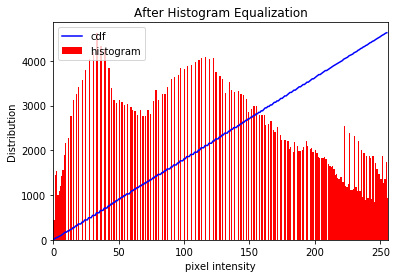

In [38]:
hist,bins = np.histogram(dst.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(dst.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('pixel intensity')
plt.ylabel('Distribution')
plt.title('After Histogram Equalization')
plt.show()

### CONCLUSION: In general, we have tried to improve the visual quality of grayscale image, transforming a low contrast image to increase the overall contrast of the image and remove noises present in the same. All this we have achieved by applying: 1. Log Transformation, 2. Gamma correction/power law Transformation,  3. Piecewise-Linear Transformation, and  4. Histogram Equalization: This can be used when we have image that look washed out or visually unappealing because they have poor contrast.